## **Installing and loading modules**

In [1]:
!pip install torchviz  > /dev/null 2>&1
!pip install umap-learn > /dev/null 2>&1
!pip install scikit-optimize > /dev/null 2>&1

In [2]:
from Train import Slope, train_slope, test_slope, set_global_seed, train_logistic_regression, train_ENet, train_MLP, count_dropping_subjects, save_pickle_object
from Plotting_Progression import plot_embedding_results, plot_progression_all_models, plot_violation_metrics, plot_subject_progression, plot_umap_embeddings
from Data_Preparation import data_preparation, demographic_information, compute_clf_metrics, prepare_data_EMCI_vs_AD_other_clf, prepare_data_EMCI_vs_AD, compute_violation_ratio_violation_gap, compute_violation_metrics

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import randint, uniform
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import umap
import pandas as pd
import numpy as np
import random

from google.colab import files


## **Data Preparation**

In [3]:
df = pd.read_csv(r"AV45_DX1234_all_preadjust_09272023.csv", parse_dates=["EXAMDATE"]).dropna().reset_index(drop=True)


continuous_df, continuous_cols, non_continuous_cols, modelling_cols, unique_subjects, train_data, test_data, \
X_train, X_test, y_train, y_test,  X_train_tensor, X_test_tensor, y_train_tensor, y_test_tensor = data_preparation(df)

train_data_identifiers, test_data_identifiers = train_data[["AGE", "VISCODE2", "RID", "EXAMDATE"]].reset_index(drop = True), test_data[["AGE", "VISCODE2", "RID", "EXAMDATE"]].reset_index(drop = True)

train_data_scaled = pd.DataFrame(X_train)
test_data_scaled = pd.DataFrame(X_test)

columns_to_add = ["RID", "DXGrp", "AGE", "VISCODE2", "EXAMDATE"]
train_data_scaled[columns_to_add] = train_data[columns_to_add].reset_index(drop=True)

test_data_scaled[columns_to_add] = test_data[columns_to_add].reset_index(drop=True)

In [4]:
print(f'Number of unique subjects in train set : {train_data["RID"].nunique()}\nNumber of unique subjects in test set  :  {test_data["RID"].nunique()}')

Number of unique subjects in train set : 768
Number of unique subjects in test set  :  193


### ***Demographic Information About the Subjects***

In [5]:
demographic_information(df)

DXGrp,CN,EMCI,LMCI,AD
Subject,266,298,194,203
Gender,119/147,174/124,119/75,123/80
Age(mean±sd),74.879586 ± 6.994822,72.500268 ± 7.111645,74.778763 ± 8.154559,75.449015 ± 7.837887
Educ(mean±sd),16.530075 ± 2.503024,16.100671 ± 2.654632,16.097938 ± 2.825806,15.783251 ± 2.655522


### ***Model 1: Logistic Regression***

##### All model finetuning perfromed in ModelFinetuning.py

In [6]:
lr_embedding_model, train_df_lr, test_df_lr = train_logistic_regression(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, train_data_identifiers, test_data_identifiers, train_data, test_data, plot_subject_progression, compute_violation_ratio_violation_gap)
lr_fig_test, lr_ax_test = plot_subject_progression(test_df_lr,  "Logistic Regression", "Normalized Logit", figsize=(8, 6))
vio_ratio_test_lr, vio_gap_test_lr = compute_violation_ratio_violation_gap(test_df_lr, 0)



### ***Model 2: Elastic Net***

In [7]:
ENet_embedding_model, train_df_en, test_df_en = train_ENet(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, train_data_identifiers, test_data_identifiers,train_data, test_data, plot_subject_progression, compute_violation_ratio_violation_gap)
en_fig_test, en_ax_test = plot_subject_progression(test_df_en, "Elastic Net", "Normalized Logit", figsize=(10, 8))
vio_ratio_test_en, vio_gap_test_en = compute_violation_ratio_violation_gap(test_df_en, 0)



### ***Model 3:  MLP***

In [50]:
MLP_embedding_model, train_df_mlp, test_df_mlp = train_MLP(X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, train_data_identifiers, test_data_identifiers, train_data, test_data, plot_subject_progression, compute_violation_ratio_violation_gap, seed=42)
mlp_fig_test, mlp_ax_test = plot_subject_progression(test_df_mlp,  "MLP", "Normalized Logit", figsize=(10, 8))
vio_ratio_mlp, vio_gap_mlp = compute_violation_ratio_violation_gap(test_df_mlp, 0)



### ***Model 4: SLOPE Model***

Training for 1550 epochs with optimizer: <class 'torch.optim.adam.Adam'>, learning rate: 2.4430162614261403e-05



,epoch,total_loss,recon_loss,directional_loss
0,0,1.649367,1.005762,1.120755
1,50,1.521569,0.984680,1.021605
2,100,1.408957,0.950943,0.940225
3,150,1.309683,0.906366,0.873158
4,200,1.219276,0.848925,0.811577
5,250,1.128360,0.776956,0.749737
6,300,1.029182,0.686445,0.690764
7,350,0.933156,0.595290,0.637931
8,400,0.843594,0.504902,0.595421
9,450,0.768332,0.424459,0.556098


Metric,Reconstruction Loss,Directional Loss,Total Loss
Set,,,
Train,0.197335,0.277346,0.362275
Test,0.190186,0.730881,0.808708


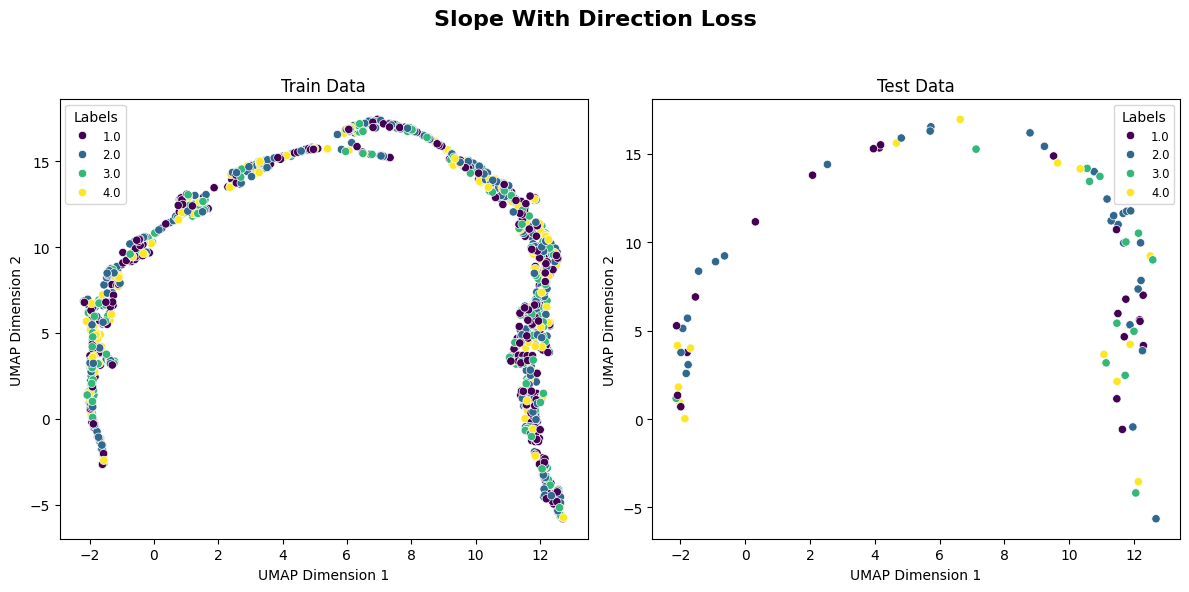

In [10]:
epochs = 1550
dims = [68, 286, 20, 286, 68]
activation = nn.ReLU
learning_rate = 2.4430162614261403e-05
criterion = nn.MSELoss()
optimizer = torch.optim.Adam
lambda_reconstruction = 0.40921304830970556
lambda_directional = 1


torch.use_deterministic_algorithms(True)
np.random.seed(42)
random.seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
set_global_seed(42)


Slope_with_direction_loss = Slope(dims=dims, activation=activation)

Slope_with_direction_loss, umap_model_with_direction_loss, data_2d_umap_train_dl, train_encoded_data_dl, lhistory = train_slope(
    model = Slope_with_direction_loss,
    train_data=train_data,
    test_data=test_data,
    X_train_tensor=X_train_tensor,
    y_train_tensor=y_train_tensor,
    X_test_tensor=X_test_tensor,
    y_test_tensor=y_test_tensor,
    train_data_identifiers=train_data_identifiers,
    test_data_identifiers=test_data_identifiers,
    criterion = criterion,
    optimizer_class = optimizer,
    lr=learning_rate,
    epochs=epochs,
    lambda_reconstruction=lambda_reconstruction,
    lambda_directional=lambda_directional,
    directional_loss_enabled=True,
    continuous_df=continuous_df,
    return_losses=True
)
data_2d_umap_test_dl, test_encoded_data_dl = test_slope(Slope_with_direction_loss,  X_test_tensor,  y_test_tensor, test_data_identifiers, umap_model_with_direction_loss)
plot_umap_embeddings(data_2d_umap_train_dl, data_2d_umap_test_dl, y_train, y_test, "Slope With Direction Loss")


### ***Model 5: SLOPE (wo direction loss) Model***

Training for 1550 epochs with optimizer: <class 'torch.optim.adam.Adam'>, learning rate: 2.4430162614261403e-05



,epoch,total_loss,recon_loss
0,0,0.411571,1.005762
1,50,0.397453,0.971263
2,100,0.364754,0.891356
3,150,0.301324,0.736350
4,200,0.212934,0.520351
5,250,0.133323,0.325803
6,300,0.092528,0.226113
7,350,0.079671,0.194694
8,400,0.076035,0.185808
9,450,0.074810,0.182815


Metric,Reconstruction Loss,Directional Loss,Total Loss
Set,,,
Train,0.107712,0.0,0.044077
Test,0.109249,0.0,0.044706


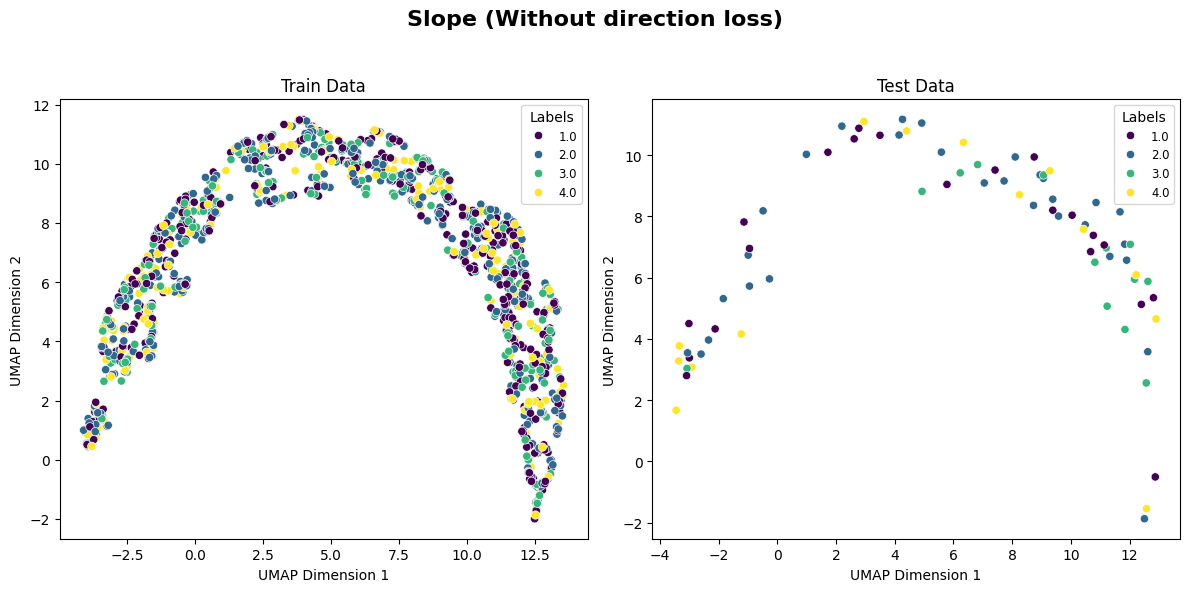

In [11]:
Slope_without_direction_loss = Slope(dims=dims, activation=activation)

Slope_without_direction_loss, umap_model_without_direction_loss, data_2d_umap_train_ndl, train_encoded_data_ndl = train_slope(
    model = Slope_without_direction_loss,
    train_data = train_data,
    test_data = test_data,
    X_train_tensor = X_train_tensor,
    y_train_tensor = y_train_tensor,
    X_test_tensor = X_test_tensor,
    y_test_tensor = y_test_tensor,
    train_data_identifiers = train_data_identifiers,
    test_data_identifiers = test_data_identifiers,
    criterion = criterion,
    optimizer_class = optimizer,
    lr=learning_rate,
    epochs= epochs,
    lambda_reconstruction=lambda_reconstruction,
    lambda_directional=lambda_directional,
    directional_loss_enabled = False,
    continuous_df = continuous_df,
    return_losses=False

)


data_2d_umap_test_ndl, test_encoded_data_ndl = test_slope(Slope_without_direction_loss,  X_test_tensor,  y_test_tensor, test_data_identifiers, umap_model_without_direction_loss)
plot_umap_embeddings(data_2d_umap_train_ndl, data_2d_umap_test_ndl, y_train, y_test, "Slope (Without direction loss)")


In [14]:
embeddings_train_lne = pd.read_csv("embeddings_train_LNE.csv")
embeddings_test_lne = pd.read_csv("embeddings_test_LNE.csv")

umap_model = umap.UMAP(n_components=2, random_state=42)
data_2d_umap_train_lne = umap_model.fit_transform(embeddings_train_lne)

train_encodings_umap_lne = pd.DataFrame(data_2d_umap_train_lne, columns = ["UMAP1", "UMAP2"])
train_encodings_umap_lne["DXGrp"] = y_train_tensor
train_encodings_umap_lne = pd.merge(train_encodings_umap_lne, train_data_identifiers, left_index=True, right_index=True)


data_2d_umap_test_lne = umap_model.transform(embeddings_test_lne)

test_encodings_umap_lne = pd.DataFrame(data_2d_umap_test_lne, columns = ["UMAP1", "UMAP2"])
test_encodings_umap_lne["DXGrp"] = y_test_tensor
test_encodings_umap_lne = pd.merge(test_encodings_umap_lne, test_data_identifiers, left_index=True, right_index=True)


In [15]:
train_encodings_umap_lne.to_csv("train_encodings_umap_lne.csv")
test_encodings_umap_lne.to_csv("test_encodings_umap_lne.csv")


lne_files = [
        "train_encodings_umap_lne.csv",
        "test_encodings_umap_lne.csv",]

for f in lne_files:
  files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
data_2d_umap_train_dl.to_csv("train_encodings_umap_dl.csv")
data_2d_umap_test_dl.to_csv("test_encodings_umap_dl.csv")

data_2d_umap_train_ndl.to_csv("train_encodings_umap_ndl.csv")
data_2d_umap_test_ndl.to_csv("test_encodings_umap_ndl.csv")

umap_files = [
        "train_encodings_umap_dl.csv",
        "test_encodings_umap_dl.csv",
        "train_encodings_umap_ndl.csv",
        "test_encodings_umap_ndl.csv"    ]


for f in umap_files:
  files.download(f)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
supervised_files = [
    "train_df_mlp.csv",
    "test_df_mlp.csv",
    "train_df_lr.csv",
    "test_df_lr.csv",
    "train_df_en.csv",
    "test_df_en.csv"]



train_df_lr.to_csv("train_df_lr.csv")
test_df_lr.to_csv("test_df_lr.csv")
train_df_en.to_csv("train_df_en.csv")
test_df_en.to_csv("test_df_en.csv")
train_df_mlp.to_csv("train_df_mlp.csv")
test_df_mlp.to_csv("test_df_mlp.csv")



for f in supervised_files:
  files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
# We need the encodings for classification task
train_encoded_data_dl_df = pd.DataFrame(train_encoded_data_dl)
train_encoded_data_ndl_df = pd.DataFrame(train_encoded_data_ndl)
test_encoded_data_ndl_df = pd.DataFrame(test_encoded_data_ndl)
test_encoded_data_dl_df = pd.DataFrame(test_encoded_data_dl)

train_encoded_data_dl_df.to_csv("train_encoded_data_dl_df.csv")
test_encoded_data_dl_df.to_csv("test_encoded_data_dl_df.csv")
train_encoded_data_ndl_df.to_csv("train_encoded_data_ndl_df.csv")
test_encoded_data_ndl_df.to_csv("test_encoded_data_ndl_df.csv")

encoding_files= [
"train_encoded_data_dl_df.csv",
"test_encoded_data_dl_df.csv",
"train_encoded_data_ndl_df.csv",
"test_encoded_data_ndl_df.csv"
]



for f in encoding_files:
  files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# Checking weights are different for the models
# They should be different
state_dict_slope_with_direction_loss = Slope_with_direction_loss.state_dict()
state_dict_slope_without_direction_loss = Slope_without_direction_loss.state_dict()

# Comparing weights layer by layer
for key in state_dict_slope_with_direction_loss.keys():
    slope_with_direction_loss_weights = state_dict_slope_with_direction_loss[key]
    slope_without_direction_loss_weights = state_dict_slope_without_direction_loss[key]

    if torch.equal(slope_with_direction_loss_weights, slope_without_direction_loss_weights):
        print(f"Layer {key}: Weights are the SAME.")
    else:
        print(f"Layer {key}: Weights are DIFFERENT.")
    print()


Layer encoder.0.weight: Weights are DIFFERENT.

Layer encoder.0.bias: Weights are DIFFERENT.

Layer encoder.2.weight: Weights are DIFFERENT.

Layer encoder.2.bias: Weights are DIFFERENT.

Layer decoder.0.weight: Weights are DIFFERENT.

Layer decoder.0.bias: Weights are DIFFERENT.

Layer decoder.2.weight: Weights are DIFFERENT.

Layer decoder.2.bias: Weights are DIFFERENT.



In [21]:
SLOPE_with_direction_loss_save_path = "SLOPE_with_direction_loss_state_dict.pth"
SLOPE_no_direction_loss_save_path = "SLOPE_without_direction_loss_state_dict.pth"

# Saving the model's state dictionary
torch.save(Slope_with_direction_loss.state_dict(), SLOPE_with_direction_loss_save_path)
torch.save(Slope_without_direction_loss.state_dict(), SLOPE_no_direction_loss_save_path)

print(f"SLOPE Model's state dictionary saved at {SLOPE_with_direction_loss_save_path}")
print(f"SLOPE Without Direction Loss Model's state dictionary saved at {SLOPE_no_direction_loss_save_path}")

files.download(SLOPE_with_direction_loss_save_path)
files.download(SLOPE_no_direction_loss_save_path)

SLOPE Model's state dictionary saved at SLOPE_with_direction_loss_state_dict.pth
SLOPE Without Direction Loss Model's state dictionary saved at SLOPE_without_direction_loss_state_dict.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Reloading the Models

In [22]:
epochs = 1550
dims = [68, 286, 20, 286, 68]
activation = nn.ReLU
learning_rate = 2.4430162614261403e-05
criterion = nn.MSELoss()
optimizer = torch.optim.Adam
lambda_reconstruction = 0.40921304830970556
lambda_directional = 1

SLOPE_with_direction_loss_reloaded = Slope(dims= dims, activation= activation)
SLOPE_without_direction_loss_reloaded = Slope(dims= dims, activation= activation)

SLOPE_with_direction_loss_reloaded.load_state_dict(torch.load("/content/SLOPE_with_direction_loss_state_dict.pth"))
SLOPE_without_direction_loss_reloaded.load_state_dict(torch.load("/content/SLOPE_without_direction_loss_state_dict.pth"))


<All keys matched successfully>

## Reading Embeddings from SLOPE With Direction Loss, Without Direction Loss, LNE & Supervised Models

In [23]:
!rm -rf Plot1_test_vs_pseudotime_dl.png \
Plot1_test_vs_pseudotime_ndl.png \
Plot1_train_vs_pseudotime_dl.png \
Plot1_train_vs_pseudotime_ndl.png \
Plot2_test_boxplot_dl.png \
Plot2_test_boxplot_ndl.png \
Plot2_train_boxplot_dl.png \
Plot2_train_boxplot_ndl.png \
Plot3_test_scatter_vs_dxg_dl.png \
Plot3_test_scatter_vs_dxg_ndl.png \
Plot3_train_scatter_vs_dxg_dl.png \
Plot3_train_scatter_vs_dxg_ndl.png \
Psuedotime_test_dl.csv \
Psuedotime_test_ndl.csv \
Psuedotime_train_dl.csv \
Psuedotime_train_ndl.csv \
train_encodings_umap_dl.csv \
test_encodings_umap_dl.csv \
train_encodings_umap_ndl.csv \
test_encodings_umap_ndl.csv \
Psuedotime_train_LNE.csv \
Psuedotime_train_ndl.csv \
Psuedotime_test_LNE.csv \


uploaded = files.upload()

Psuedotime_train_dl = pd.read_csv("Psuedotime_train_dl.csv").sort_values(["AGE", "RID"])
Psuedotime_test_dl = pd.read_csv("Psuedotime_test_dl.csv").sort_values(["AGE", "RID"])

Psuedotime_train_ndl = pd.read_csv("Psuedotime_train_ndl.csv").sort_values(["AGE", "RID"])
Psuedotime_test_ndl = pd.read_csv("Psuedotime_test_ndl.csv").sort_values(["AGE", "RID"])

Psuedotime_train_LNE = pd.read_csv("Psuedotime_train_LNE.csv").sort_values(["AGE", "RID"])
Psuedotime_test_LNE = pd.read_csv("Psuedotime_test_LNE.csv").sort_values(["AGE", "RID"])


Saving Plot_test_boxplot_en.png to Plot_test_boxplot_en.png
Saving Plot_test_boxplot_lr.png to Plot_test_boxplot_lr.png
Saving Plot_test_boxplot_mlp.png to Plot_test_boxplot_mlp.png
Saving Plot_train_boxplot_en.png to Plot_train_boxplot_en.png
Saving Plot_train_boxplot_lr.png to Plot_train_boxplot_lr.png
Saving Plot_train_boxplot_mlp.png to Plot_train_boxplot_mlp.png
Saving Plot1_test_vs_pseudotime_dl.png to Plot1_test_vs_pseudotime_dl.png
Saving Plot1_test_vs_pseudotime_LNE.png to Plot1_test_vs_pseudotime_LNE.png
Saving Plot1_test_vs_pseudotime_ndl.png to Plot1_test_vs_pseudotime_ndl.png
Saving Plot1_train_vs_pseudotime_dl.png to Plot1_train_vs_pseudotime_dl.png
Saving Plot1_train_vs_pseudotime_LNE.png to Plot1_train_vs_pseudotime_LNE.png
Saving Plot1_train_vs_pseudotime_ndl.png to Plot1_train_vs_pseudotime_ndl.png
Saving Plot2_test_boxplot_dl.png to Plot2_test_boxplot_dl.png
Saving Plot2_test_boxplot_LNE.png to Plot2_test_boxplot_LNE.png
Saving Plot2_test_boxplot_ndl.png to Plot2_tes

### ***Visualizing Results***

In [24]:
dl_train_images = [
    'Plot1_train_vs_pseudotime_dl.png',
    'Plot3_train_scatter_vs_dxg_dl.png',
    'Plot2_train_boxplot_dl.png',
]

dl_test_images = [
    'Plot1_test_vs_pseudotime_dl.png',
    'Plot3_test_scatter_vs_dxg_dl.png',
    'Plot2_test_boxplot_dl.png',

    ]

ndl_train_images = [
    'Plot1_train_vs_pseudotime_ndl.png',
    'Plot3_train_scatter_vs_dxg_ndl.png',
    'Plot2_train_boxplot_ndl.png',
]

ndl_test_images = [
    'Plot1_test_vs_pseudotime_ndl.png',
    'Plot3_test_scatter_vs_dxg_ndl.png',
    'Plot2_test_boxplot_ndl.png',
    ]

LNE_train_images = [
    'Plot1_train_vs_pseudotime_LNE.png',
    'Plot3_train_scatter_vs_dxg_LNE.png',
    'Plot2_train_boxplot_LNE.png',
]


LNE_test_images = [
    'Plot1_test_vs_pseudotime_LNE.png',
    'Plot3_test_scatter_vs_dxg_LNE.png',
    'Plot2_test_boxplot_LNE.png',

    ]

lr_images = ['Plot_train_boxplot_lr.png' ,'Plot_test_boxplot_lr.png']
en_images = ['Plot_train_boxplot_en.png' ,'Plot_test_boxplot_en.png']
mlp_images = ['Plot_train_boxplot_mlp.png' ,'Plot_test_boxplot_mlp.png']

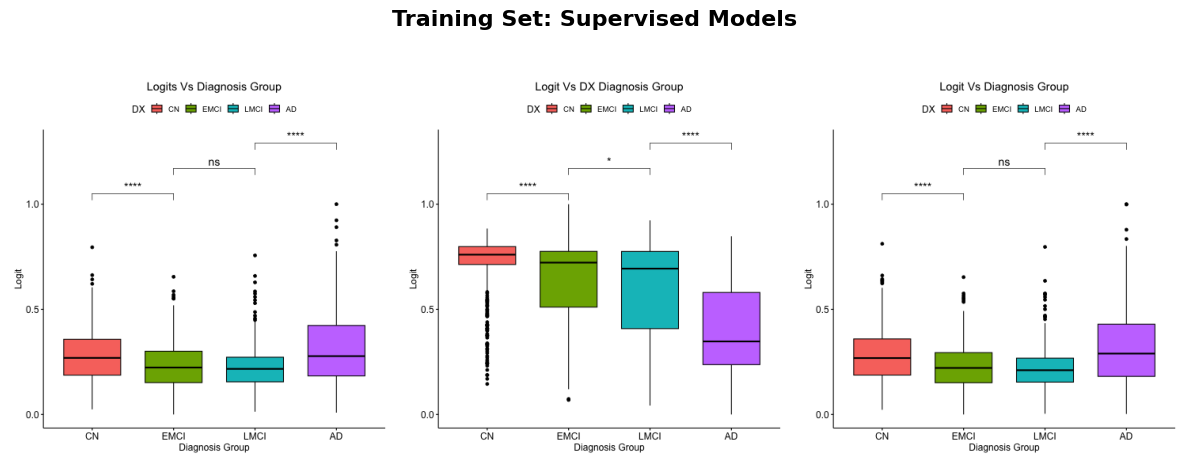

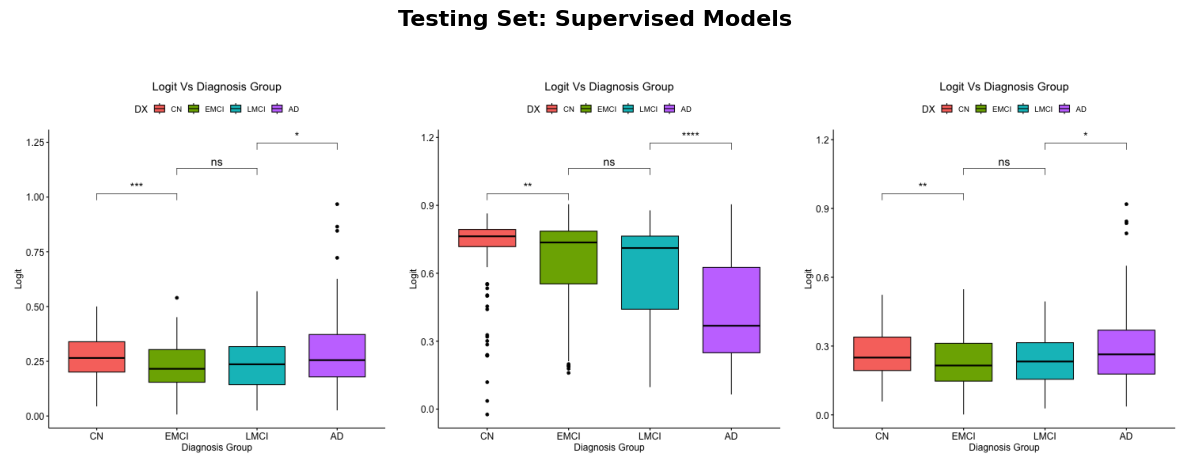

In [25]:
plot_embedding_results([lr_images[0], mlp_images[0], en_images[0]], "Training Set: Supervised Models", (12, 5))
print()
plot_embedding_results([lr_images[1], mlp_images[1], en_images[1]], "Testing Set: Supervised Models", (12, 5))

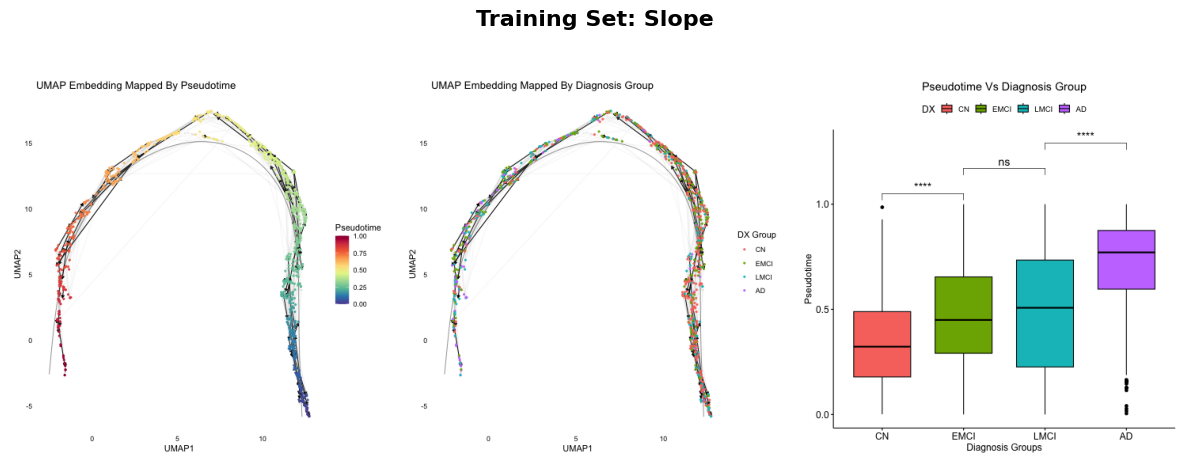

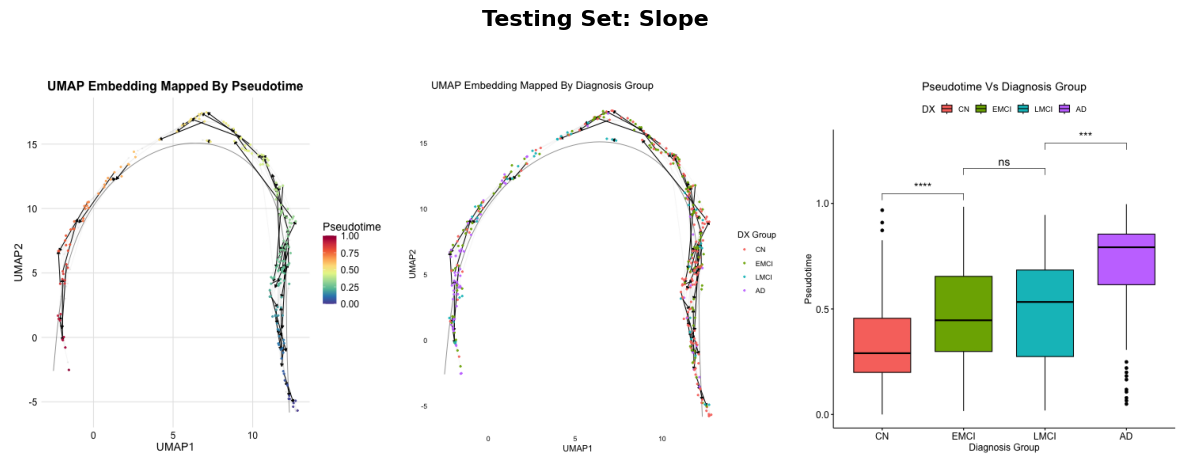

In [26]:
plot_embedding_results(dl_train_images, "Training Set: Slope", (12, 5))
print()
plot_embedding_results(dl_test_images, "Testing Set: Slope", (12, 5))

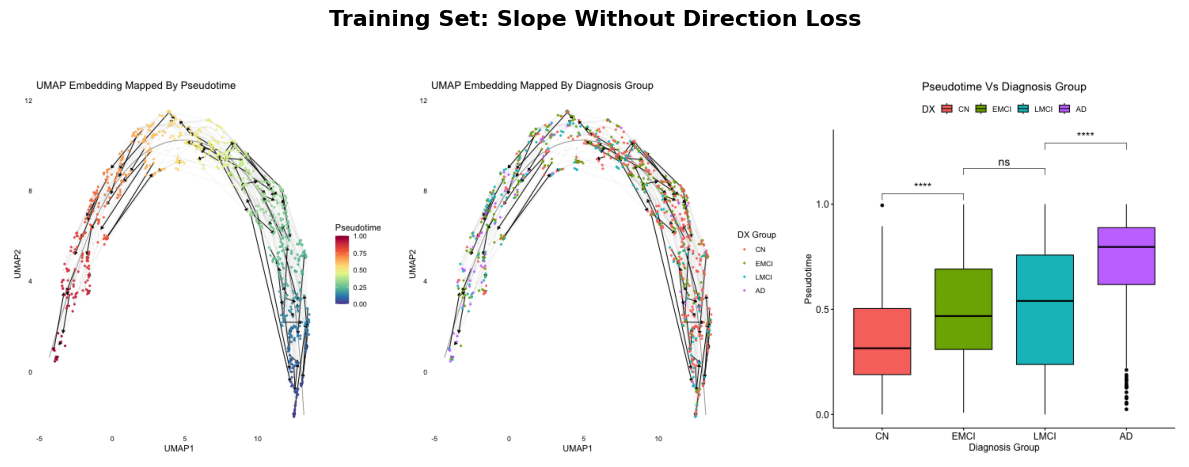

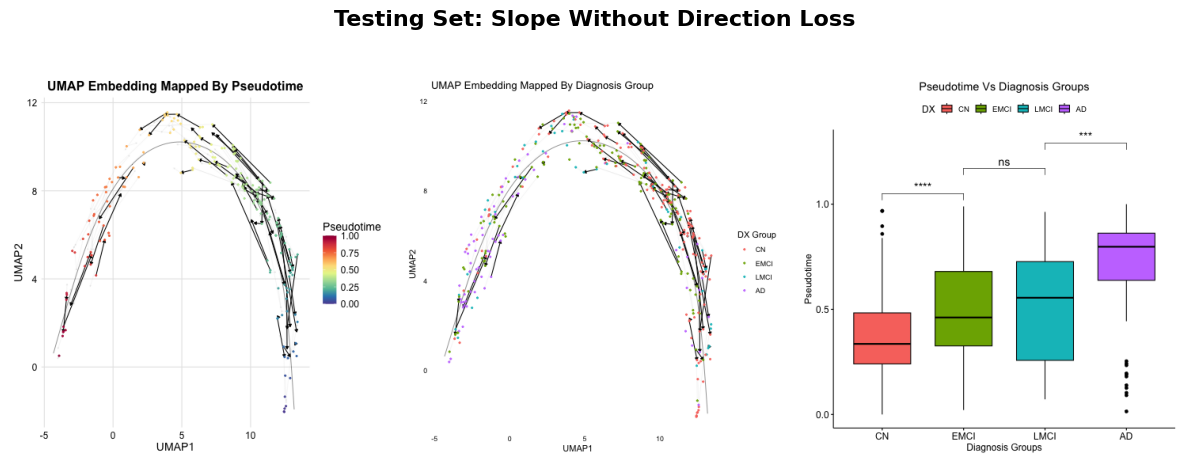

In [28]:
plot_embedding_results(ndl_train_images, "Training Set: Slope Without Direction Loss", (12, 5))
print()
plot_embedding_results(ndl_test_images, "Testing Set: Slope Without Direction Loss", (12, 5))


In [29]:
dropping_dl = count_dropping_subjects(Psuedotime_train_dl, "RID", "AGE", "Pseudotime_Normalized")
dropping_ndl = count_dropping_subjects(Psuedotime_train_ndl, "RID", "AGE", "Pseudotime_Normalized")
dropping_LNE = count_dropping_subjects(Psuedotime_train_LNE, "RID", "AGE", "Pseudotime_Normalized")
dropping_lr = count_dropping_subjects(train_df_lr, "RID", "AGE", "Pseudotime_Normalized")
dropping_en = count_dropping_subjects(train_df_en, "RID", "AGE", "Pseudotime_Normalized")
dropping_mlp = count_dropping_subjects(train_df_mlp, "RID", "AGE", "Pseudotime_Normalized")

print("Train:")
print("Dropping subjects DL: ", dropping_dl)
print("Dropping subjects NDL: ", dropping_ndl)
print("Dropping subjects LNE: ", dropping_LNE)
print("Dropping subjects LR: ", dropping_lr)
print("Dropping subjects EN: ", dropping_en)
print("Dropping subjects MLP: ", dropping_mlp)


dropping_dl = count_dropping_subjects(Psuedotime_test_dl, "RID", "AGE", "Pseudotime_Normalized")
dropping_ndl = count_dropping_subjects(Psuedotime_test_ndl, "RID", "AGE", "Pseudotime_Normalized")
dropping_LNE = count_dropping_subjects(Psuedotime_test_LNE, "RID", "AGE", "Pseudotime_Normalized")
dropping_lr = count_dropping_subjects(test_df_lr, "RID", "AGE", "Pseudotime_Normalized")
dropping_en = count_dropping_subjects(test_df_en, "RID", "AGE", "Pseudotime_Normalized")
dropping_mlp = count_dropping_subjects(test_df_mlp, "RID", "AGE", "Pseudotime_Normalized")

print()
print("Test:")
print("Dropping subjects DL: ", dropping_dl)
print("Dropping subjects NDL: ", dropping_ndl)
print("Dropping subjects LNE: ", dropping_LNE)
print("Dropping subjects LR: ", dropping_lr)
print("Dropping subjects EN: ", dropping_en)
print("Dropping subjects MLP: ", dropping_mlp)


Train:
Dropping subjects DL:  211
Dropping subjects NDL:  239
Dropping subjects LNE:  214
Dropping subjects LR:  300
Dropping subjects EN:  299
Dropping subjects MLP:  77

Test:
Dropping subjects DL:  47
Dropping subjects NDL:  56
Dropping subjects LNE:  53
Dropping subjects LR:  76
Dropping subjects EN:  79
Dropping subjects MLP:  86


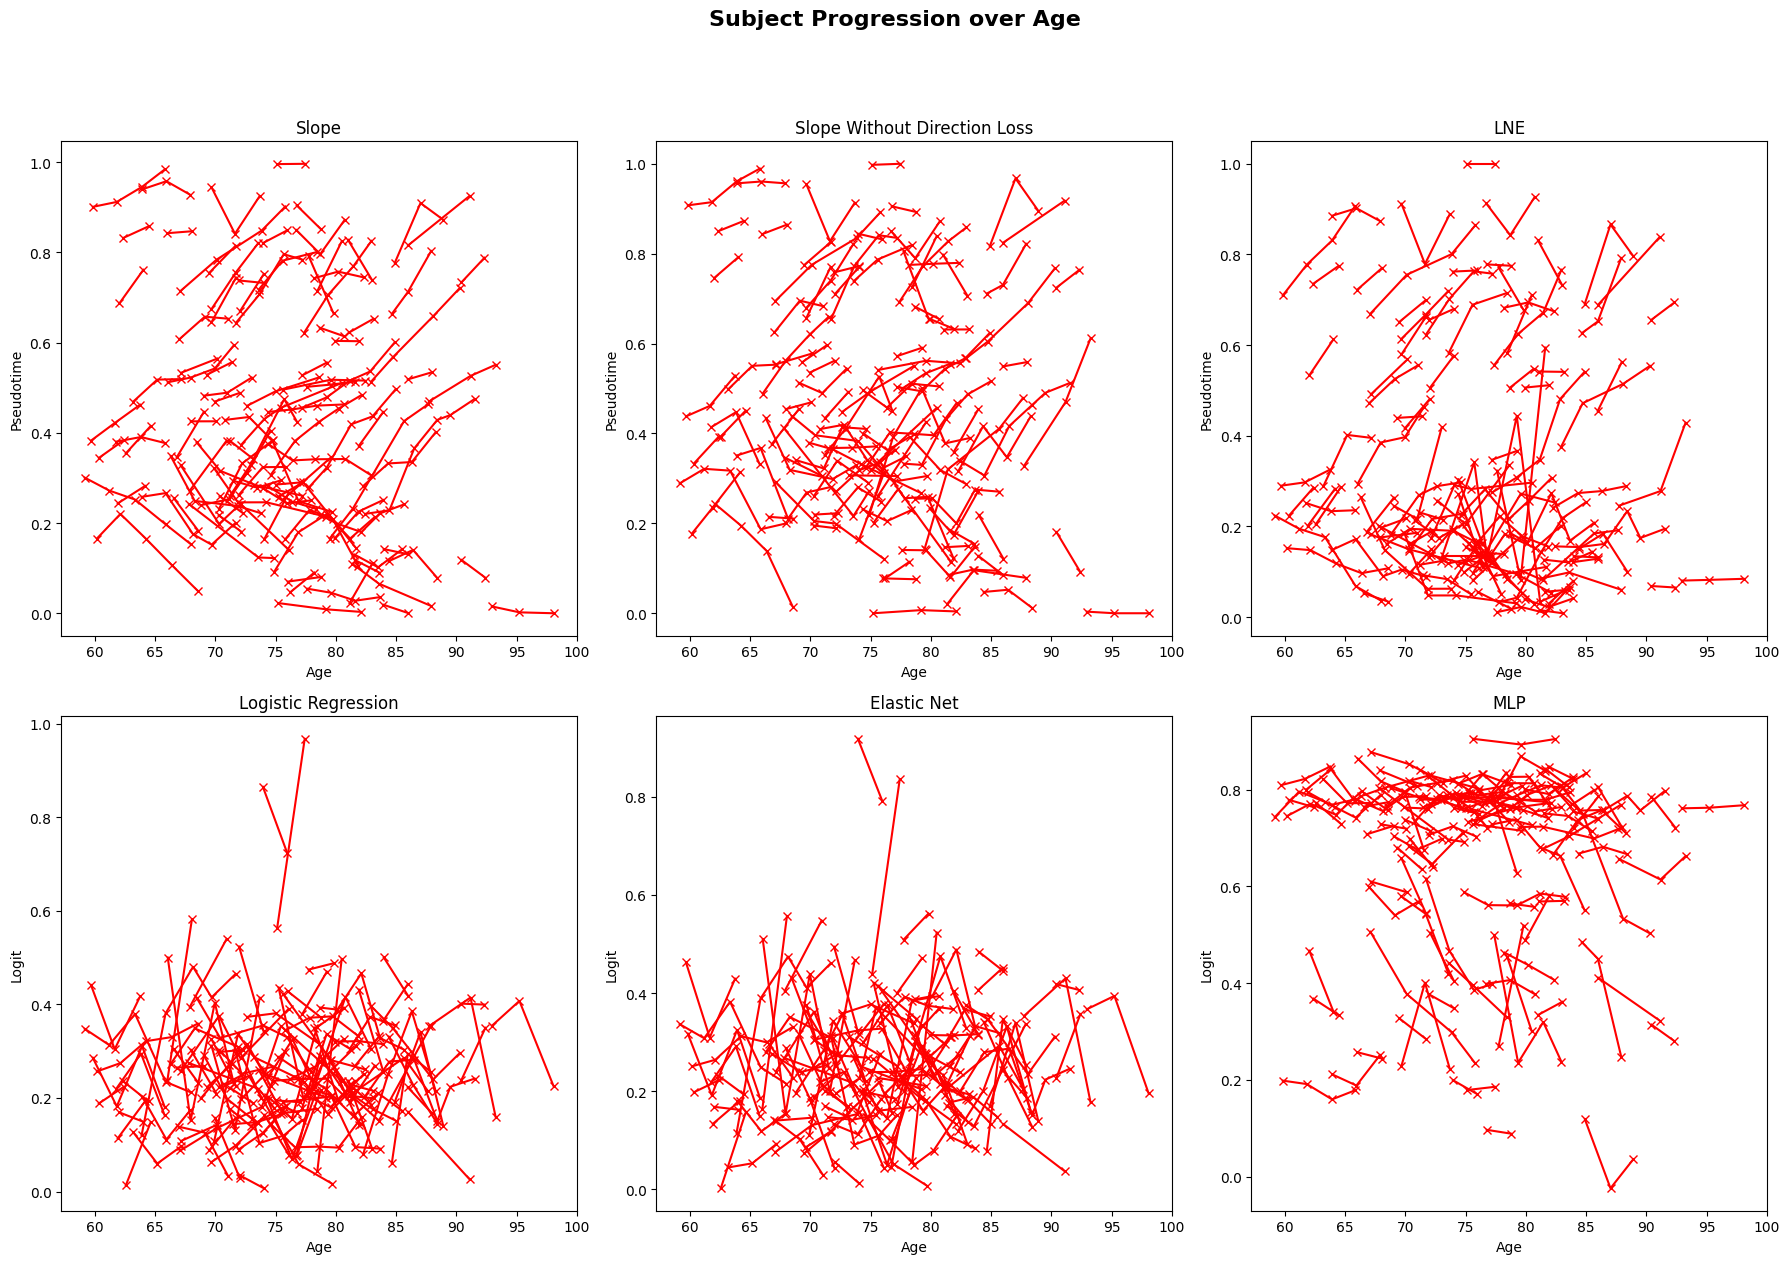

In [30]:
SLOPE_fig, SLOPE_ax_dl = plot_subject_progression(Psuedotime_test_dl,  "SLOPE", "Psuedotime", figsize =  (8, 6))
SLOPE_fig_ndl, SLOPE_ax_ndl = plot_subject_progression(Psuedotime_test_ndl, "SLOPE Without direction loss", "Psuedotime" ,figsize =  (8, 6))
LNE_fig, ax_LNE = plot_subject_progression(Psuedotime_test_LNE, "LNE", "Psuedotime" ,figsize =  (8, 6))



plot_progression_all_models(
    [
        (SLOPE_fig, SLOPE_ax_dl),
        (SLOPE_fig_ndl, SLOPE_ax_ndl),
        (LNE_fig, ax_LNE),
        (lr_fig_test, lr_ax_test),
        (en_fig_test, en_ax_test),
        (mlp_fig_test, mlp_ax_test)
    ]
)


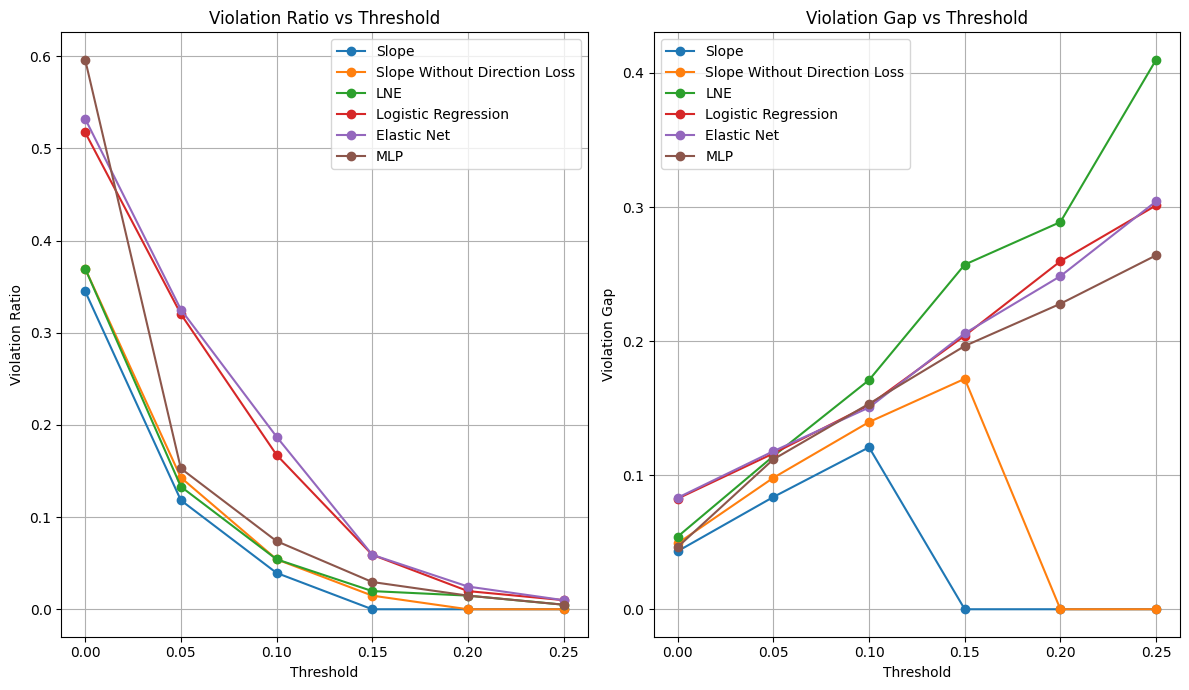

In [32]:
data_objects = {
    'Slope': Psuedotime_test_dl,
    'Slope Without Direction Loss': Psuedotime_test_ndl,
    'LNE': Psuedotime_test_LNE,
    'Logistic Regression': test_df_lr,
    'Elastic Net': test_df_en,
    'MLP': test_df_mlp
}
thresholds = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25]

results = compute_violation_metrics(data_objects, thresholds)
plot_violation_metrics(results, thresholds, figsize = (12, 7))


# **CN vs AD Classification**

Models prepared for three different embeddings :



*   SLOPE embeddings
*   SLOPE without direction loss embeddings
*   Embeddings from original data or simply raw data.

Models tested:



1.   Logistic Regression
2.   Elastic Net
3.   MLP




## Data Preparation: CN Vs AD

In [33]:
## SLOPE
X_dl_train_enc_1vs4, y_dl_train_enc_1vs4, dl_train_enc_1vs4 = prepare_data_EMCI_vs_AD(
    train_data_scaled, train_encoded_data_dl, target_column='DXGrp', id_column='RID',
    date_column='EXAMDATE', target_classes=[1, 4]
)
X_dl_test_enc_1vs4, y_dl_test_enc_1vs4, dl_test_enc_1vs4 = prepare_data_EMCI_vs_AD(
    test_data_scaled, test_encoded_data_dl, target_column='DXGrp', id_column='RID',
    date_column='EXAMDATE', target_classes=[1, 4]
)

scaler_dl = StandardScaler()
X_dl_train_enc_1vs4 = scaler_dl.fit_transform(X_dl_train_enc_1vs4)
X_dl_test_enc_1vs4 = scaler_dl.transform(X_dl_test_enc_1vs4)


## SLOPE Without Direction Loss
X_ndl_train_enc_1vs4, y_ndl_train_enc_1vs4, ndl_train_enc_1vs4 = prepare_data_EMCI_vs_AD(train_data_scaled, train_encoded_data_ndl, target_column='DXGrp', id_column='RID', date_column='EXAMDATE', target_classes=[1, 4])
X_ndl_test_enc_1vs4, y_ndl_test_enc_1vs4, ndl_test_enc_1vs4 = prepare_data_EMCI_vs_AD(test_data_scaled, test_encoded_data_ndl, target_column='DXGrp', id_column='RID', date_column='EXAMDATE', target_classes=[1, 4])


scaler_ndl = StandardScaler()
X_ndl_train_enc_1vs4 = scaler_ndl.fit_transform(X_ndl_train_enc_1vs4)
X_ndl_test_enc_1vs4 = scaler_ndl.transform(X_ndl_test_enc_1vs4)


## LNE
X_LNE_train_enc_1vs4, y_LNE_train_enc_1vs4, LNE_train_enc_1vs4 = prepare_data_EMCI_vs_AD(train_data_scaled, embeddings_train_lne, target_column='DXGrp', id_column='RID', date_column='EXAMDATE', target_classes=[1, 4])
X_LNE_test_enc_1vs4, y_LNE_test_enc_1vs4, LNE_test_enc_1vs4 = prepare_data_EMCI_vs_AD(test_data_scaled, embeddings_test_lne, target_column='DXGrp', id_column='RID', date_column='EXAMDATE', target_classes=[1, 4])


scaler_ndl = StandardScaler()
X_LNE_train_enc_1vs4 = scaler_ndl.fit_transform(X_LNE_train_enc_1vs4)
X_LNE_test_enc_1vs4 = scaler_ndl.transform(X_LNE_test_enc_1vs4)


# Original
X_train_other_clf_1vs4, y_train_other_clf_1vs4, dl_train_enc_1vs4_other_clf = prepare_data_EMCI_vs_AD_other_clf(train_data_scaled,  target_column='DXGrp', id_column='RID', date_column='EXAMDATE', target_classes=[1, 4])
X_test_other_clf_1vs4, y_test_other_clf_1vs4, dl_test_enc_1vs4_other_clf = prepare_data_EMCI_vs_AD_other_clf(test_data_scaled,  target_column='DXGrp', id_column='RID', date_column='EXAMDATE', target_classes=[1, 4])

scaler_other = StandardScaler()
X_train_other_clf_1vs4 = scaler_other.fit_transform(X_train_other_clf_1vs4)
X_test_other_clf_1vs4 = scaler_other.transform(X_test_other_clf_1vs4)


### ***1. Logistic Regression***

In [34]:
param_grid_lr = {
    'C': uniform(0.01, 100),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': randint(100, 2000),
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'fit_intercept': [True, False],
}


#### ***SLOPE***

In [35]:
lr_model = LogisticRegression(random_state=42)

random_search_lr = RandomizedSearchCV(
    estimator = lr_model,
    param_distributions = param_grid_lr,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)


random_search_lr.fit(X_dl_train_enc_1vs4, y_dl_train_enc_1vs4)

finetuned_1vs4_logreg_SLOPE = random_search_lr.best_estimator_

y_train_pred_logreg_SLOPE = finetuned_1vs4_logreg_SLOPE.predict(X_dl_train_enc_1vs4)
y_test_pred_logreg_SLOPE = finetuned_1vs4_logreg_SLOPE.predict(X_dl_test_enc_1vs4)

lr_train_metrics_SLOPE = compute_clf_metrics(y_dl_train_enc_1vs4, y_train_pred_logreg_SLOPE)
lr_test_metrics_SLOPE = compute_clf_metrics(y_dl_test_enc_1vs4, y_test_pred_logreg_SLOPE)


results_1vs4_logreg_SLOPE = pd.DataFrame([lr_test_metrics_SLOPE],
                          index=[ 'Slope + Logistic Regression']).round(3)

display(results_1vs4_logreg_SLOPE)



Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Slope + Logistic Regression,0.841,0.858,0.858


#### ***SLOPE Without Direction Loss***

In [36]:
lr_model = LogisticRegression(random_state=42)

random_search_lr = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid_lr,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_lr.fit(X_ndl_train_enc_1vs4, y_ndl_train_enc_1vs4)

finetuned_1vs4_logreg_No_SLOPE = random_search_lr.best_estimator_



y_train_pred_logreg_No_SLOPE = finetuned_1vs4_logreg_No_SLOPE.predict(X_ndl_train_enc_1vs4)
y_test_pred_logreg_No_SLOPE = finetuned_1vs4_logreg_No_SLOPE.predict(X_ndl_test_enc_1vs4)

lr_train_metrics_No_SLOPE = compute_clf_metrics(y_ndl_train_enc_1vs4, y_train_pred_logreg_No_SLOPE)
lr_test_metrics_No_SLOPE = compute_clf_metrics(y_ndl_test_enc_1vs4, y_test_pred_logreg_No_SLOPE)


results_1vs4_logreg_No_SLOPE = pd.DataFrame([lr_test_metrics_No_SLOPE],
                          index=[ 'Slope Without Direction Loss + Logistic Regression']).round(3)

display(results_1vs4_logreg_No_SLOPE)



Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Slope Without Direction Loss + Logistic Regression,0.8,0.825,0.825


#### ***LNE***

In [37]:
lr_model = LogisticRegression(random_state=42)

random_search_lr = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid_lr,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_lr.fit(X_LNE_train_enc_1vs4, y_LNE_train_enc_1vs4)

finetuned_1vs4_logreg_LNE = random_search_lr.best_estimator_



y_train_pred_logreg_LNE = finetuned_1vs4_logreg_LNE.predict(X_LNE_train_enc_1vs4)
y_test_pred_logreg_LNE = finetuned_1vs4_logreg_LNE.predict(X_LNE_test_enc_1vs4)

lr_train_metrics_LNE = compute_clf_metrics(y_LNE_train_enc_1vs4, y_train_pred_logreg_LNE)
lr_test_metrics_LNE = compute_clf_metrics(y_LNE_test_enc_1vs4, y_test_pred_logreg_LNE)


results_1vs4_logreg_LNE = pd.DataFrame([lr_test_metrics_LNE],
                          index=[ 'LNE + Logistic Regression']).round(3)

display(results_1vs4_logreg_LNE)



Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
LNE + Logistic Regression,0.814,0.836,0.836


#### ***Original***

In [38]:
lr_model = LogisticRegression(random_state=42)

random_search_lr = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=param_grid_lr,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_lr.fit(X_train_other_clf_1vs4, y_train_other_clf_1vs4)

finetuned_1vs4_logreg_Original = random_search_lr.best_estimator_


y_train_pred_logreg = finetuned_1vs4_logreg_Original.predict(X_train_other_clf_1vs4)
y_test_pred_logreg = finetuned_1vs4_logreg_Original.predict(X_test_other_clf_1vs4)

lr_train_metrics_other = compute_clf_metrics(y_train_other_clf_1vs4, y_train_pred_logreg)
lr_test_metrics_other = compute_clf_metrics(y_test_other_clf_1vs4, y_test_pred_logreg)


results_1vs4_logreg = pd.DataFrame([lr_test_metrics_other],
                          index=[ 'Original + Logistic Regression']).round(3)

display(results_1vs4_logreg)


Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Original + Logistic Regression,0.771,0.803,0.803


### ***2. Elastic Net***

In [39]:

param_grid_enet = {
    'C': uniform(0.05, 100),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': np.linspace(0, 1, 20),
    'fit_intercept': [True, False],
}


#### ***SLOPE***

In [40]:
en_model = LogisticRegression(penalty='elasticnet', random_state=42)

random_search_en = RandomizedSearchCV(
    estimator=en_model,
    param_distributions=param_grid_enet,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_en.fit(X_dl_train_enc_1vs4, y_dl_train_enc_1vs4)

best_en_model_dl = random_search_en.best_estimator_

y_train_pred_en_SLOPE = best_en_model_dl.predict(X_dl_train_enc_1vs4)
y_test_pred_en_SLOPE = best_en_model_dl.predict(X_dl_test_enc_1vs4)

en_train_metrics_SLOPE = compute_clf_metrics(y_dl_train_enc_1vs4, y_train_pred_en_SLOPE)
en_test_metrics_SLOPE = compute_clf_metrics(y_dl_test_enc_1vs4, y_test_pred_en_SLOPE)

results_1vs4_en_SLOPE = pd.DataFrame([en_test_metrics_SLOPE],
                                     index=['Slope + Elastic Net']).round(3)

display(results_1vs4_en_SLOPE)



Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Slope + Elastic Net,0.841,0.858,0.858


### ***SLOPE Without Direction Loss***

In [41]:
en_model = LogisticRegression(penalty='elasticnet', random_state=42)

random_search_en_ndl = RandomizedSearchCV(
    estimator=en_model,
    param_distributions=param_grid_enet,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_en_ndl.fit(X_ndl_train_enc_1vs4, y_ndl_train_enc_1vs4)

best_en_model_ndl = random_search_en_ndl.best_estimator_

y_train_pred_ndl_en = best_en_model_ndl.predict(X_ndl_train_enc_1vs4)
y_test_pred_ndl_en = best_en_model_ndl.predict(X_ndl_test_enc_1vs4)

train_metrics_en_ndl = compute_clf_metrics(y_ndl_train_enc_1vs4, y_train_pred_ndl_en)
test_metrics_en_ndl = compute_clf_metrics(y_ndl_test_enc_1vs4, y_test_pred_ndl_en)

results_No_SLOPE_1vs4_en = pd.DataFrame([test_metrics_en_ndl],
                                        index=['Slope Without Direction Loss + Elastic Net']).round(3)

display(results_No_SLOPE_1vs4_en)


Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Slope Without Direction Loss + Elastic Net,0.814,0.836,0.836


#### ***LNE***

In [42]:

en_model = LogisticRegression(penalty='elasticnet', random_state=42)

random_search_en_LNE = RandomizedSearchCV(
    estimator=en_model,
    param_distributions=param_grid_enet,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_en_LNE.fit(X_LNE_train_enc_1vs4, y_LNE_train_enc_1vs4)

best_en_model_LNE = random_search_en_LNE.best_estimator_

y_train_pred_LNE_en = best_en_model_LNE.predict(X_LNE_train_enc_1vs4)
y_test_pred_LNE_en = best_en_model_LNE.predict(X_LNE_test_enc_1vs4)

train_metrics_en_LNE = compute_clf_metrics(y_ndl_train_enc_1vs4, y_train_pred_LNE_en)
test_metrics_en_LNE = compute_clf_metrics(y_ndl_test_enc_1vs4, y_test_pred_LNE_en)

results_LNE_1vs4_en = pd.DataFrame([test_metrics_en_LNE],
                                        index=['LNE + Elastic Net']).round(3)

display(results_LNE_1vs4_en)


Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
LNE + Elastic Net,0.822,0.84,0.84


### ***Original***



In [43]:
en_model = LogisticRegression(penalty='elasticnet', random_state=42)

random_search_en_other = RandomizedSearchCV(
    estimator=en_model,
    param_distributions=param_grid_enet,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_en_other.fit(X_train_other_clf_1vs4, y_train_other_clf_1vs4)

best_en_model_other_1vs4 = random_search_en_other.best_estimator_



y_train_pred_other_1vs4_en = best_en_model_other_1vs4.predict(X_train_other_clf_1vs4)
y_test_pred_other_1vs4_en = best_en_model_other_1vs4.predict(X_test_other_clf_1vs4)

en_train_metrics_other = compute_clf_metrics(y_train_other_clf_1vs4, y_train_pred_other_1vs4_en)
en_test_metrics_other = compute_clf_metrics(y_test_other_clf_1vs4, y_test_pred_other_1vs4_en)

results_other_1vs4_en = pd.DataFrame([en_test_metrics_other],
                                     index=['Original + Elastic Net']).round(3)

display(results_other_1vs4_en)


Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Original + Elastic Net,0.776,0.805,0.805


### ***3. MLP***


In [44]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 50), (100, 100), (150, 100, 50)],
    'activation': ['relu', 'tanh', 'logistic', 'identity'],
    'alpha': uniform(1e-6, 1e-1),
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}


#### ***SLOPE***


In [45]:
mlp_classifier = MLPClassifier(random_state=42)

random_search_MLP_dl = RandomizedSearchCV(
    estimator=mlp_classifier,
    param_distributions=param_grid_mlp,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_MLP_dl.fit(X_dl_train_enc_1vs4, y_dl_train_enc_1vs4)

best_mlp_model_dl = random_search_MLP_dl.best_estimator_

y_train_pred_dl_mlp = best_mlp_model_dl.predict(X_dl_train_enc_1vs4)
y_test_pred_dl_mlp = best_mlp_model_dl.predict(X_dl_test_enc_1vs4)

train_metrics_mlp_dl = compute_clf_metrics(y_dl_train_enc_1vs4, y_train_pred_dl_mlp)
test_metrics_mlp_dl = compute_clf_metrics(y_dl_test_enc_1vs4, y_test_pred_dl_mlp)

results_SLOPE_mlp = pd.DataFrame([test_metrics_mlp_dl],
                              index=[ 'Slope + MLP']).round(3)

display(results_SLOPE_mlp)



Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Slope + MLP,0.814,0.836,0.836


### ***SLOPE Without Direction Loss***


In [46]:
mlp_classifier = MLPClassifier(random_state=42)

random_search_MLP_ndl = RandomizedSearchCV(
    estimator=mlp_classifier,
    param_distributions=param_grid_mlp,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_MLP_ndl.fit(X_ndl_train_enc_1vs4, y_ndl_train_enc_1vs4)

best_mlp_model_ndl = random_search_MLP_ndl.best_estimator_


y_train_pred_ndl_mlp = best_mlp_model_ndl.predict(X_ndl_train_enc_1vs4)
y_test_pred_ndl_mlp = best_mlp_model_ndl.predict(X_ndl_test_enc_1vs4)

train_metrics_mlp_ndl = compute_clf_metrics(y_ndl_train_enc_1vs4, y_train_pred_ndl_mlp)
test_metrics_mlp_ndl = compute_clf_metrics(y_ndl_test_enc_1vs4, y_test_pred_ndl_mlp)

results_NO_SLOPE_mlp = pd.DataFrame([ test_metrics_mlp_ndl],
                               index=[ 'Slope Without Direction Loss + MLP']).round(3)

display(results_NO_SLOPE_mlp)



Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Slope Without Direction Loss + MLP,0.786,0.814,0.814


#### ***LNE***

In [47]:
mlp_classifier = MLPClassifier(random_state=42)

random_search_MLP_LNE = RandomizedSearchCV(
    estimator=mlp_classifier,
    param_distributions=param_grid_mlp,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_MLP_LNE.fit(X_LNE_train_enc_1vs4, y_LNE_train_enc_1vs4)

best_mlp_model_LNE = random_search_MLP_LNE.best_estimator_


y_train_pred_LNE_mlp = best_mlp_model_LNE.predict(X_LNE_train_enc_1vs4)
y_test_pred_LNE_mlp = best_mlp_model_LNE.predict(X_LNE_test_enc_1vs4)

train_metrics_mlp_LNE = compute_clf_metrics(y_ndl_train_enc_1vs4, y_train_pred_LNE_mlp)
test_metrics_mlp_LNE = compute_clf_metrics(y_ndl_test_enc_1vs4, y_test_pred_LNE_mlp)

results_LNE_mlp = pd.DataFrame([ test_metrics_mlp_LNE],
                               index=[ 'LNE + MLP']).round(3)

display(results_LNE_mlp)



Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
LNE + MLP,0.805,0.827,0.827


### ***Original***


In [48]:
mlp_classifier = MLPClassifier(random_state=42)


random_search_MLP_other = RandomizedSearchCV(
    estimator=mlp_classifier,
    param_distributions=param_grid_mlp,
    n_iter=200,
    cv=2,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    scoring='balanced_accuracy'
)

random_search_MLP_other.fit(X_train_other_clf_1vs4, y_train_other_clf_1vs4)

best_mlp_model_other = random_search_MLP_other.best_estimator_

y_train_pred_other_1vs4_mlp = best_mlp_model_other.predict(X_train_other_clf_1vs4)
y_test_pred_other_1vs4_mlp = best_mlp_model_other.predict(X_test_other_clf_1vs4)

train_metrics_other_1vs4_mlp = compute_clf_metrics(y_train_other_clf_1vs4, y_train_pred_other_1vs4_mlp)
test_metrics_other_1vs4_mlp = compute_clf_metrics(y_test_other_clf_1vs4, y_test_pred_other_1vs4_mlp)

results_other_mlp = pd.DataFrame([test_metrics_other_1vs4_mlp],
                                      index=[ 'Original + MLP']).round(3)
display(results_other_mlp)


Fitting 2 folds for each of 200 candidates, totalling 400 fits


,F1-Score,Balanced Accuracy,ROC-AUC
Original + MLP,0.75,0.79,0.79


## Results

In [49]:
print("Results For Test Set: CN Vs AD")
results_1vs4_final = pd.concat([results_1vs4_logreg_SLOPE, results_1vs4_logreg_No_SLOPE, results_1vs4_logreg_LNE, results_1vs4_logreg, results_1vs4_en_SLOPE, results_No_SLOPE_1vs4_en, results_LNE_1vs4_en,  results_other_1vs4_en, results_SLOPE_mlp, results_NO_SLOPE_mlp, results_LNE_mlp, results_other_mlp])
results_1vs4_final

Results For Test Set: CN Vs AD


,F1-Score,Balanced Accuracy,ROC-AUC
Slope + Logistic Regression,0.841,0.858,0.858
Slope Without Direction Loss + Logistic Regression,0.800,0.825,0.825
LNE + Logistic Regression,0.814,0.836,0.836
Original + Logistic Regression,0.771,0.803,0.803
Slope + Elastic Net,0.841,0.858,0.858
Slope Without Direction Loss + Elastic Net,0.814,0.836,0.836
LNE + Elastic Net,0.822,0.840,0.840
Original + Elastic Net,0.776,0.805,0.805
Slope + MLP,0.814,0.836,0.836
Slope Without Direction Loss + MLP,0.786,0.814,0.814


## Saving all model objects

In [52]:
import pickle
from google.colab import files
model_pickle_files = {
    "lr_embedding_model.pkl": lr_embedding_model,
    "ENet_embedding_model.pkl": ENet_embedding_model,
    "MLP_embedding_model.pkl": MLP_embedding_model,
    "finetuned_1vs4_logreg_SLOPE.pkl": finetuned_1vs4_logreg_SLOPE,
    "finetuned_1vs4_logreg_No_SLOPE.pkl": finetuned_1vs4_logreg_No_SLOPE,
    "finetuned_1vs4_logreg_LNE.pkl": finetuned_1vs4_logreg_LNE,
    "finetuned_1vs4_logreg_Original.pkl": finetuned_1vs4_logreg_Original,
    "best_en_model_dl.pkl": best_en_model_dl,
    "best_en_model_ndl.pkl": best_en_model_ndl,
    "best_en_model_LNE.pkl": best_en_model_LNE,
    "best_en_model_other_1vs4.pkl": best_en_model_other_1vs4,
    "best_mlp_model_dl.pkl": best_mlp_model_dl,
    "best_mlp_model_ndl.pkl": best_mlp_model_ndl,
    "best_mlp_model_LNE.pkl": best_mlp_model_LNE,
    "best_mlp_model_other.pkl": best_mlp_model_other
}

for filename, model in model_pickle_files.items():
    with open(filename, "wb") as f:
        pickle.dump(model, f)

for filename in model_pickle_files.keys():
    files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>